# CREATE DATASET

In [4]:
import scipy.io as scio
base = scio.loadmat('ndata.mat')
x,y = base['orgin'].transpose(),base['result'][:,1]

 normalizing

In [5]:
xmin,xmax = x.min(),x.max()
x=(x-xmin)/(xmax-xmin)
ymin,ymax = y.min(axis=0),y.max(axis=0)
y =  (y-ymin)/(ymax-ymin)

show the spectrum

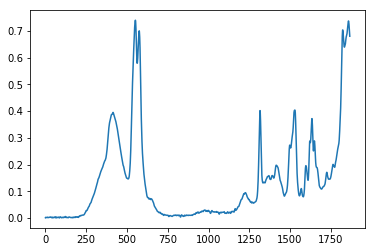

In [6]:
import matplotlib.pyplot as plt
plt.plot(x[2,:])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=0)

# BUILD MODEL

SET PRAMETERS

In [9]:
tuned_parameters = [{'kernel':['rbf'],'gamma':[1e-3,1e-4],
                 'C':[1,10,100,1000]},
                {'kernel':['linear'],'C':[1,10,100,1000]}]
mse = 'neg_mean_squared_error'

In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [21]:
print('#Tuning hyper-parameters for MSE')
print()
grape = GridSearchCV(SVR(C=1),tuned_parameters,scoring= mse,cv=3,verbose=0,n_jobs=-1)
grape.fit(x_train,y_train)

#Tuning hyper-parameters for MSE



GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.001, 0.0001], 'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [28]:
print('Best parameters set found on development set:')
print()
print(grape.best_params_)

print()
means = grape.cv_results_['mean_test_score']
stds = grape.cv_results_['std_test_score']
    
for mean,std,params in zip(means,stds,grape.cv_results_['params']):
    print('%0.3f(+/- %0.03f) for %r'%(mean,std*2,params))
    
print()
print('Detailed Regression Report:')
print()
print('The Model is trained on the full development set.')
print('The scores are computed on the full evaluation set.')
print()

Best parameters set found on development set:

{'gamma': 0.0001, 'kernel': 'rbf', 'C': 1000}

-0.073(+/- 0.027) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1}
-0.098(+/- 0.030) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1}
-0.015(+/- 0.005) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 10}
-0.073(+/- 0.027) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 10}
-0.004(+/- 0.003) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 100}
-0.015(+/- 0.005) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 100}
-0.004(+/- 0.003) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1000}
-0.004(+/- 0.003) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1000}
-0.004(+/- 0.003) for {'kernel': 'linear', 'C': 1}
-0.004(+/- 0.003) for {'kernel': 'linear', 'C': 10}
-0.004(+/- 0.003) for {'kernel': 'linear', 'C': 100}
-0.004(+/- 0.003) for {'kernel': 'linear', 'C': 1000}

Detailed Regression Report:

The Model is trained on the full development set.
The scores are computed on the full evaluation set.



In [34]:
y_train_true,y_train_pred = y_train,grape.predict(x_train)
y_test_true, y_test_pred  = y_test, grape.predict(x_test)
print( r2_score(y_test_true, y_test_pred),
      r2_score(y_train_true,y_train_pred))

0.956828093004 0.96508716957


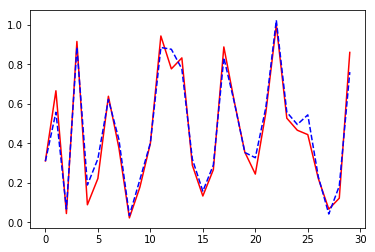

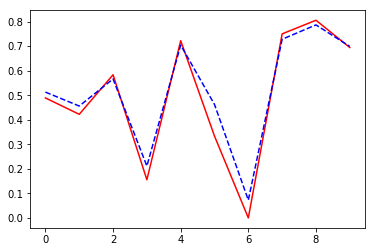

In [37]:
import numpy as np
import matplotlib.pyplot as plt
train_numb,test_numb = len(y_train_true),len(y_test_pred)
plt.plot(np.arange(train_numb),y_train_true,'r-',
        np.arange(train_numb), y_train_pred,'b--')
plt.show()
plt.plot(np.arange(test_numb),y_test_true,'r-',
        np.arange(test_numb), y_test_pred,'b--')
plt.show()